# The Battle of Neighborhoods

## Best locations for a new sporting goods store in Chicago
By Maksim Balunov

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a>Introduction</a>

2. <a>Data</a>

3. <a>Methodology</a>

4. <a>Results</a>
   
5. <a>Conclusions</a>
</font>
</div>

## Introduction

Chicago is one of the most populated cities in the USA. Chicago is one of ten U.S. cities to have teams from the five major American professional team sports (baseball, football, basketball, hockey, soccer). Chicago has been named as the Best Sports City by Sporting News three times in 1993, 2006 and 2010.

### The Task At Hand

The company that is specialized on selling sporting goods decided to expend it's business to Chicago. They already have multiple shops in big cities, and found out that most profitable of them are in the neigborhood of various sportive objects, especially various gyms. As far as not all of their shops are highly profitable, they need to be more selective and intelligent in their shop positioning. Chicago is also a new market for them and they suffer from the lack of information.

During the discussion of a business problem we've formulated some criteria, that should be met in desired neigborhood. Business highly relies on gym visitors, so the area should be highly densed with gyms. But not only the number of them is significant. During the previous analisys company found out, that the popularity of gyms plays an important role. They found out, that in areas where gyms are more frequent venues (in other words most typical or common), their shops are more profitable. So we need to make qualitative and quantitative analysis. Foursquare API will be very helpful in making data-driven decision.

### The goal
So what is the goal of that work? It is obvious. We need to make a data-driven decision, which locations are the best to begin with expansion to Chicago. The results should be easily understandable by stackeholders.

Additionally, this work may be interesting to various other companies, as it explains methods and ways of finding solution.

## Data

Various sources of data were used not only to resolve the problem, described above, but also to get acquainted with city of Chicago and some aspects of its life. Some of that sources are not directly used in this work, but they are a part of investigation work.

1. <a href="https://data.cityofchicago.org/">Chicago Open data portal</a> - The City of Chicago's open data portal lets you find city data, lets you find facts about your neighborhood, lets you create maps and graphs about the city, and lets you freely download the data for your own analysis. Many of these datasets are updated at least once a day, and many of them are updated several times a day.

2. <a href="https://wikipedia.org">Wikipedia</a> - Wikipedia is a free encyclopedia, that contains a great amount of data. Several pages were used do get detailed information to solve a task. <a href="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago">List of neighborhoods in Chicago</a> for neighborhood exploration, and <a href="https://en.wikipedia.org/wiki/Community_areas_in_Chicago">Community areas in Chicago</a> for a community areas understanding.

3. <a href="https://developer.foursquare.com/">Foursquare API</a> - An incredible tool to get information about venues, coordinates and many other well detailed information.

## Methodology

First thing the first. Let's begin with downloading and intalling needed libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.geocoders import Yandex

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

# import BeautifulSoup for html parsing
from bs4 import BeautifulSoup

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


Now we scrap a <a href="https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago">List of neighborhoods in Chicago page</a> from Wikipedia. Various of different sources were explored and this page seems to be the most detailed of them. After scraping we create a pandas dataframe.

In [2]:
# Take info from wiki page
html_doc = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago').text
soup = BeautifulSoup(html_doc,'lxml')
soup_table = soup.find('table')
soup_table

# Populate datafreame column names
table_headers = soup_table.find_all('th')
column_names = []
for n in range(len(table_headers)):
    column_names.append(table_headers[n].text.strip())
nb = pd.DataFrame(columns=column_names)

# Populate dataframe values
table_rows = soup_table.find_all('tr')
table_rows
for n in range (1, len(table_rows)):
    tds = table_rows[n].find_all('td')
    neigh = tds[0].text.strip()
    ca = tds[1].text.strip()
    nb = nb.append({'Neighborhood': neigh,
                    'Community area': ca}, ignore_index=True)

# Choose the first ca for each neigborhood for multiple ca
for n in range(len(nb)):
    nb.loc[n,'Community area'] = nb.loc[n,'Community area'].partition(',')[0]
nb.head()

,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


Now, when we have a dataframe with neighborhoods and community areas, let's find neighborhoods coordinates. We will use Notanium geolocator for this.

In [3]:
#Find coordinates for neighborhoods

for n in range(240,len(nb)):
    address = nb['Neighborhood'][n] + ', ' + nb['Community area'][n] + ', Chicago'
    geolocator = Nominatim(user_agent="ch")
    location = geolocator.geocode(address)
    if(location is None):
        latitude = 0
        longitude = 0
    else:    
        latitude = location.latitude
        longitude = location.longitude
    print('{},{},{},{}'.format(nb['Neighborhood'][n],nb['Community area'][n], latitude, longitude))

Wicker Park,West Town,41.9078018,-87.6781551
Wildwood,Forest Glen,42.00469075,-87.77592449680378
Woodlawn,Woodlawn,41.7794786,-87.599493
Wrightwood,Ashburn,41.7494222,-87.702636
Wrightwood Neighbors,Lincoln Park,0,0
Wrigleyville,Lake View,41.947022,-87.6564773


During the usage it was found out, that it is not very reliable. So for availability of data I saved data to csv file and placed it to github. Some of coordinates were added manually, i've found them with google and yandex, the others I was not able to find, so I've just droped that rows.

In [4]:
# Coordinates are saved in csv file uploaded to github for avaiability
nb = pd.read_csv('https://raw.githubusercontent.com/imbocoffee/Coursera_Capstone/master/Chicago_Coordinates_neigh.csv')
# drop rows, where we were not able to find coordinates
nb = nb[nb['Latitude'] != 0].reset_index(drop=True)
nb

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park,Albany Park,41.971937,-87.716174
1,Altgeld Gardens,Riverdale,41.654864,-87.600446
2,Andersonville,Edgewater,41.977139,-87.669273
3,Archer Heights,Archer Heights,41.811422,-87.726165
4,Armour Square,Armour Square,41.840033,-87.633107
5,Ashburn,Ashburn,41.749352,-87.713514
6,Auburn Gresham,Auburn Gresham,41.750757,-87.662948
7,Avalon Park,Avalon Park,41.745035,-87.588658
8,Avondale,Avondale,41.938921,-87.711168
9,Back of the Yards,New City,41.807533,-87.666163


So, we've found coordinates for 188 neighborhoods. Good job!

In [5]:
nb.shape

(188, 4)

Plot them on the map to inspect visually. First we find coordinates of Chicago itself:

In [6]:
# Find Chicago coordinates
from geopy.geocoders import Nominatim 

address = 'Chicago'

# Define the user_agent as Paris_explorer
geolocator = Nominatim(user_agent="Chicago_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Chicago are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Chicago are 41.8755616, -87.6244212.


Then point markers of neighborhoods on the map.

In [7]:
# create map of Paris using the above latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, label in zip(nb['Latitude'], nb['Longitude'], nb['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

Oops! It seems to be, that several neighborhoods are not on there real places. I've found their coordinates with google and inmproved data manually.

In [8]:
# Manualy improve coordinates for some Neighborhoods
for n in range(len(nb)):
    if nb.loc[n,'Neighborhood'] == 'Lake View':
        nb.loc[n,'Latitude'] = 41.939781
        nb.loc[n,'Longitude'] = -87.658927
    elif nb.loc[n,'Neighborhood'] == 'Oakland':
        nb.loc[n,'Latitude'] = 41.8227
        nb.loc[n,'Longitude'] = -87.601357
    elif nb.loc[n,'Neighborhood'] == 'Lincoln Square':
        nb.loc[n,'Latitude'] = 41.968682
        nb.loc[n,'Longitude'] = -87.688965    
nb

,Neighborhood,Community area,Latitude,Longitude
0,Albany Park,Albany Park,41.971937,-87.716174
1,Altgeld Gardens,Riverdale,41.654864,-87.600446
2,Andersonville,Edgewater,41.977139,-87.669273
3,Archer Heights,Archer Heights,41.811422,-87.726165
4,Armour Square,Armour Square,41.840033,-87.633107
5,Ashburn,Ashburn,41.749352,-87.713514
6,Auburn Gresham,Auburn Gresham,41.750757,-87.662948
7,Avalon Park,Avalon Park,41.745035,-87.588658
8,Avondale,Avondale,41.938921,-87.711168
9,Back of the Yards,New City,41.807533,-87.666163


Now let's check, that we have no duplicates of coordinates for different neighborhoods and, if so leave only the first one.

In [9]:
# Remove duplicated coordinates and take the first neighborhood
nb = nb.groupby('Latitude').first().reset_index()
nb = nb.groupby('Longitude').first().reset_index()
nb.shape

(171, 4)

We can say now, that our data is clean. We have 171 neighborhoods. Plot the final result on the map. I can say that I'm glad with distribution of points and its number.

In [10]:
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=11)


# add markers to map
for lat, lng, label in zip(nb['Latitude'], nb['Longitude'], nb['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_chicago)  
    
map_chicago

With the next step we define our Foursquare credentials to get more detailed information.

In [11]:
CLIENT_ID = 'KNOJGTU4NWVSLQA41Y12FKTHJABSP03GPLWGNY1ZN5UQKGTH' # your Foursquare ID
CLIENT_SECRET = '01UTOJOJIWLNJYCWEORLQIMAP0MIR5RXD33H4EEIMG5NKBUX' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
VERSION = '20200101' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KNOJGTU4NWVSLQA41Y12FKTHJABSP03GPLWGNY1ZN5UQKGTH
CLIENT_SECRET:01UTOJOJIWLNJYCWEORLQIMAP0MIR5RXD33H4EEIMG5NKBUX


## Exploratory data analysis

### Explore the first neighborhood

Take a look on the first neighborhood in our dataframe. Get its name.

In [12]:
# Find first neighborhood
nb.loc[0, 'Neighborhood']

"O'Hare"

Then find its coordinates from our dataframe.

In [13]:
neighborhood_latitude = nb.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = nb.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = nb.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of O'Hare are 41.977921200000004, -87.9031406.


First, let's create the GET request URL. It will let us to find top 100 venues in the neighborhood within a radius of 500 meters.

In [14]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=KNOJGTU4NWVSLQA41Y12FKTHJABSP03GPLWGNY1ZN5UQKGTH&client_secret=01UTOJOJIWLNJYCWEORLQIMAP0MIR5RXD33H4EEIMG5NKBUX&v=20200101&ll=41.977921200000004,-87.9031406&radius=500&limit=100'

Send the GET request and examine the resutls.

In [15]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2587c8fb34b500284f2097'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Chicago',
  'headerFullLocation': 'Chicago',
  'headerLocationGranularity': 'city',
  'totalResults': 94,
  'suggestedBounds': {'ne': {'lat': 41.98242120450001,
    'lng': -87.89709864861823},
   'sw': {'lat': 41.9734211955, 'lng': -87.90918255138178}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b8c6dbef964a52064d032e3',
       'name': 'Garrett Popcorn Shops',
       'location': {'address': 'Terminal 3',
        'crossStreet': 'ORD Airport',
        'lat': 41.97604660359226,
        'lng': -87.9020243883133,
        'labeledL

The information we need is stored in *items* key. We define the **get_category_type** do get data.

In [16]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [17]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Garrett Popcorn Shops,Snack Place,41.976047,-87.902024
1,Argo Tea,Tea Room,41.975817,-87.902590
2,Delta Air Lines Ticket Counter,Airport Service,41.976418,-87.904570
3,Garrett Popcorn Shops,Snack Place,41.978830,-87.906890
4,O'Hare Yoga Room,Yoga Studio,41.975487,-87.903245
5,Publican Tavern,Gastropub,41.976573,-87.900908
6,Argo Tea,Tea Room,41.977470,-87.899133
7,Tortas Frontera by Rick Bayless,Mexican Restaurant,41.975421,-87.900147
8,Summer House Santa Monica,American Restaurant,41.976611,-87.905583
9,Tortas Frontera by Rick Bayless,Mexican Restaurant,41.980000,-87.906803


And how many venues were returned by Foursquare?

In [18]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

94 venues were returned by Foursquare.


### Explore all the neighborhoods of Chicago

Now when we are able to extract data to dataframe for the first neigborhood, let's define a function that will repeat the same process for all of our neighborhoods.

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create a new dataframe, that holds all needed information of chicago venues.

In [20]:
chicago_venues = getNearbyVenues(names=nb['Neighborhood'],
                                   latitudes=nb['Latitude'],
                                   longitudes=nb['Longitude']
                                  )

O'Hare
Edison Park
Oriole Park
Belmont Terrace
Montclare
Dunning
Norwood Park East
Galewood
Old Norwood
Brickyard
Schorsch Village
Wildwood
Clearing East
Gladstone Park
Hanson Park
Belmont Central
The Island
Edgebrook
Jefferson Park
Cragin
South Edgebrook
Forest Glen
Vittum Park
Garfield Ridge
LeClaire Courts
Sauganash
Sleepy Hollow
West Humboldt Park
Kilbourn Park
Kelvyn Park
Mayfair
Irving Park
Hermosa
West Garfield Park
Belmont Gardens
Archer Heights
Scottsdale
West Elsdon
Kosciuszko Park
West Lawn
Peterson Park
North Lawndale
Albany Park
Ashburn
South Lawndale
Hollywood Park
Avondale
Homan Square
Mount Greenwood
Logan Square
Marquette Park
East Garfield Park
Humboldt Park
Ravenswood Manor
Douglas Park
Brighton Park
Chicago Lawn
West Ridge
Gage Park
Ravenswood Gardens
Marshall Square
Bowmanville
Smith Park
Lincoln Square
Lithuanian Plaza
West Town
Ukrainian Village
Kennedy Park
Beverly Woods
North Center
Roscoe Village
Wicker Park
Rogers Park
Ravenswood
McKinley Park
Illinois Medica

In [21]:
# Find all venues in neighborhoods
print(chicago_venues.shape)
chicago_venues.head()

(4281, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,O'Hare,41.977921,-87.903141,Garrett Popcorn Shops,41.976047,-87.902024,Snack Place
1,O'Hare,41.977921,-87.903141,Argo Tea,41.975817,-87.902590,Tea Room
2,O'Hare,41.977921,-87.903141,Delta Air Lines Ticket Counter,41.976418,-87.904570,Airport Service
3,O'Hare,41.977921,-87.903141,Garrett Popcorn Shops,41.978830,-87.906890,Snack Place
4,O'Hare,41.977921,-87.903141,O'Hare Yoga Room,41.975487,-87.903245,Yoga Studio


Let's take a breif look at venue's distribution across neighborhoods.

In [22]:
# Count number of venues for each neigborhood
chicago_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,15,15,15,15,15,15
Altgeld Gardens,3,3,3,3,3,3
Andersonville,77,77,77,77,77,77
Archer Heights,18,18,18,18,18,18
Armour Square,11,11,11,11,11,11
Ashburn,6,6,6,6,6,6
Auburn Gresham,7,7,7,7,7,7
Avalon Park,12,12,12,12,12,12
Avondale,27,27,27,27,27,27


As we can see, the distribution of venues is rather uneven. As far, as one of the goals of our investigation is to find neighborhoods with high popularity of gyms, we will not take into account such neighborhoods, which have extremely low numbers ov venues overall. We create a series of such neighborhoods.

In [23]:
# Create series of neighborhoods with low number of venues
cc=chicago_venues.groupby('Neighborhood').count().reset_index()
l = cc.loc[cc['Venue'] <= 5,'Neighborhood']

And filter our dataframe.

In [24]:
# Select only venues for densed neighborhoods
chicago_venues = chicago_venues[~chicago_venues['Neighborhood'].isin(l)]
chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,O'Hare,41.977921,-87.903141,Garrett Popcorn Shops,41.976047,-87.902024,Snack Place
1,O'Hare,41.977921,-87.903141,Argo Tea,41.975817,-87.902590,Tea Room
2,O'Hare,41.977921,-87.903141,Delta Air Lines Ticket Counter,41.976418,-87.904570,Airport Service
3,O'Hare,41.977921,-87.903141,Garrett Popcorn Shops,41.978830,-87.906890,Snack Place
4,O'Hare,41.977921,-87.903141,O'Hare Yoga Room,41.975487,-87.903245,Yoga Studio


Let's find out how many unique categories can be curated from all the returned venues.

In [25]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 338 uniques categories.


There are variuos kinds of gyms in Foursquare output, so list them. The second dataframe contains a list of sporting goods shops of Chicago.

In [26]:
#Create dataframes which contain info about locations of various kinds of gyms and sporting goods shops
chicago_venues_gyms = chicago_venues[chicago_venues['Venue Category'].str.contains('Gym')]
chicago_venues_shop = chicago_venues[chicago_venues['Venue Category'] == 'Sporting Goods Shop']
chicago_venues_gyms.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
69,O'Hare,41.977921,-87.903141,Hilton O'Hare Fitness Center And Spa.,41.977547,-87.904083,Gym
161,Norwood Park East,41.987245,-87.793098,Dog House Crossfit,41.987218,-87.790157,Gym
222,Brickyard,41.929444,-87.788131,XSport Fitness,41.925177,-87.787765,Gym
331,The Island,41.887876,-87.764851,YMCA,41.889375,-87.764858,Gym
498,Kelvyn Park,41.929318,-87.737968,Anytime Fitness,41.930930,-87.743310,Gym / Fitness Center


What is the number of various gyms and sporting goods shops in the city?

In [27]:
print('There are {} gyms and {} shops in Chicago.'.format(len(chicago_venues_gyms),len(chicago_venues_shop)))

There are 126 gyms and 13 shops in Chicago.


Create a dataframe that contains a number of gyms for each neighborhood. We will take into account top 20 neighborhoods by this metric. This dataframe will help us to answer one of the questions.

In [28]:
# Count number of gyms for each neighborhood
chicago_venues_gyms_count = chicago_venues_gyms.groupby('Neighborhood').count().reset_index()
# Order by desc and add coordinates
cvgcs = chicago_venues_gyms_count.sort_values(by='Venue', ascending=False)
col_list = ['Neighborhood','Gyms']
cvgcs = cvgcs.iloc[:,0:2]
cvgcs.columns = ['Neighborhood','Gyms']
top_nb_by_num = pd.merge(cvgcs, nb, on = 'Neighborhood', how ='left').head(20)
top_nb_by_num

,Neighborhood,Gyms,Longitude,Latitude,Community area
0,River North,9,-87.635719,41.896471,Near North Side
1,Printer's Row,7,-87.628900,41.873787,The Loop
2,Dearborn Park,6,-87.628954,41.866553,Near South Side
3,Greektown,5,-87.646932,41.878445,Near West Side
4,Park West,5,-87.645661,41.920892,Lincoln Park
5,East Village,5,-87.655358,41.896198,West Town
6,Lincoln Square,5,-87.688965,41.968682,Lincoln Square
7,Bucktown,4,-87.670123,41.916211,Logan Square
8,Cabrini-Green,4,-87.640937,41.898805,Near North Side
9,Near North Side,4,-87.634497,41.900033,Near North Side


Vizualisation is one of the most important ways to explore and understand the data. Let's take a look on gyms and shops locations on the map. (We will plot all of them, not only top 20 neigborhoods).

In [50]:
map_chicago_gyms = folium.Map(location=[latitude, longitude], zoom_start=12)


# add markers to map
for lat, lng, label in zip(chicago_venues_gyms['Venue Latitude'], chicago_venues_gyms['Venue Longitude'], chicago_venues_gyms['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,
        parse_html=False).add_to(map_chicago_gyms)

for lat, lng, label in zip(chicago_venues_shop['Venue Latitude'], chicago_venues_shop['Venue Longitude'], chicago_venues_shop['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        parse_html=False).add_to(map_chicago_gyms)    
    
map_chicago_gyms

All gyms are ploted, and their distribution in terms of real nubmer is stored in dataframe. Now let's find gyms distribution in termas of popularity (how typical gyms are for each neigborhood).

In [30]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Residence Hall,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Loo

In [31]:
chicago_onehot.shape

(4185, 339)

In [32]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Carpet Store,Check Cashing Service,Cheese Shop,Child Care Service,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Cafeteria,College Residence Hall,Colombian Restaurant,Comedy Club,Comic Shop,Community Center,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Creperie,Cuban Restaurant,Cupcake Shop,Currency Exchange,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Disc Golf,Discount Store,Distillery,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Exhibit,Eye Doctor,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Stand,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Laundry Service,Leather Goods Store,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Mac & Cheese Joint,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Military Base,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Movie Theater,Moving Target,Multiplex,Museum,Music Store,Music Venue,Nail Salon,National Park,Nature Preserve,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paper / Office Supplies Store,Park,Parking,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Service,Pet Store,Pharmacy,Pie Shop,Pilates Studio,Pizza Place,Platform,Playground,Plaza,Poke Place,Polish Restaurant,Pool,Portuguese Restaurant,Pub,Public Art,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Rental Service,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Scenic Loo

In [33]:
chicago_grouped.shape

(142, 339)

We gather all types of gyms into one column, and then drop initial columns.

In [34]:
# Find various gyms and combine them to one column
chicago_gyms = chicago_grouped.filter(like='Gym',axis=1)
cgg = chicago_gyms.sum(axis=1)
droplist = chicago_gyms.columns
droplist

Index(['Boxing Gym', 'Climbing Gym', 'Gym', 'Gym / Fitness Center'], dtype='object')

In [35]:
# drop columns with various gyms
chicago_grouped.drop(droplist, axis = 1, inplace=True)
chicago_grouped.shape

(142, 335)

Create a dataframe, that contains top 20 neighborhoods in popularity metric.

In [36]:
# Find neighborhoods where gyms are popular
chicago_grouped['Gyms'] = cgg
top_nb_by_pop = chicago_grouped.sort_values(by=['Gyms'], ascending=False).head(20)
top_nb_by_pop = top_nb_by_pop[['Neighborhood','Gyms']]
top_nb_by_pop = pd.merge(top_nb_by_pop, nb, on = 'Neighborhood', how ='left')
top_nb_by_pop

,Neighborhood,Gyms,Longitude,Latitude,Community area
0,Kennedy Park,0.285714,-87.683482,41.687226,Morgan Park
1,Nortown,0.166667,-87.660611,41.910530,West Ridge
2,Bucktown,0.166667,-87.670123,41.916211,Logan Square
3,East Village,0.147059,-87.655358,41.896198,West Town
4,Near North Side,0.133333,-87.634497,41.900033,Near North Side
5,Norwood Park East,0.125000,-87.793098,41.987245,Norwood Park
6,River North,0.113924,-87.635719,41.896471,Near North Side
7,Cabrini-Green,0.102564,-87.640937,41.898805,Near North Side
8,Mayfair,0.100000,-87.737837,41.968087,Albany Park
9,Canaryville,0.100000,-87.640329,41.814756,New City


And dataframe of sporting goods shops distibution in Chicago overall.

In [37]:
# Find shops by neighborhood
nb_shops = chicago_grouped[['Neighborhood','Sporting Goods Shop']]
nb_shops

,Neighborhood,Sporting Goods Shop
0,Albany Park,0.000000
1,Andersonville,0.000000
2,Archer Heights,0.000000
3,Armour Square,0.000000
4,Ashburn,0.000000
5,Auburn Gresham,0.000000
6,Avalon Park,0.000000
7,Avondale,0.000000
8,Back of the Yards,0.000000
9,Belmont Central,0.000000


Merge shops dataframe with both gyms dataframes for the neighborhoods of interest.

In [38]:
if not top_nb_by_num.columns.contains('Sporting Goods Shop'):
    top_nb_by_num = pd.merge(top_nb_by_num, nb_shops, on = 'Neighborhood', how ='left')
if not top_nb_by_pop.columns.contains('Sporting Goods Shop'):    
    top_nb_by_pop = pd.merge(top_nb_by_pop, nb_shops, on = 'Neighborhood', how ='left')
top_nb_by_pop

,Neighborhood,Gyms,Longitude,Latitude,Community area,Sporting Goods Shop
0,Kennedy Park,0.285714,-87.683482,41.687226,Morgan Park,0.000000
1,Nortown,0.166667,-87.660611,41.910530,West Ridge,0.000000
2,Bucktown,0.166667,-87.670123,41.916211,Logan Square,0.000000
3,East Village,0.147059,-87.655358,41.896198,West Town,0.000000
4,Near North Side,0.133333,-87.634497,41.900033,Near North Side,0.000000
5,Norwood Park East,0.125000,-87.793098,41.987245,Norwood Park,0.000000
6,River North,0.113924,-87.635719,41.896471,Near North Side,0.000000
7,Cabrini-Green,0.102564,-87.640937,41.898805,Near North Side,0.000000
8,Mayfair,0.100000,-87.737837,41.968087,Albany Park,0.000000
9,Canaryville,0.100000,-87.640329,41.814756,New City,0.000000


Let's print each neighborhood along with the top 5 most common venues. Are there any neighborhoods, where gyms are popular or common in other words?

In [39]:
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Albany Park----
                venue  freq
0      Sandwich Place  0.13
1       Grocery Store  0.13
2  Chinese Restaurant  0.07
3   Korean Restaurant  0.07
4        Cocktail Bar  0.07


----Andersonville----
                venue  freq
0                Gyms  0.04
1  Italian Restaurant  0.04
2      Sandwich Place  0.04
3         Coffee Shop  0.04
4            Beer Bar  0.03


----Archer Heights----
                venue  freq
0  Mexican Restaurant  0.17
1   Mobile Phone Shop  0.17
2         Gas Station  0.11
3       Grocery Store  0.11
4       Big Box Store  0.06


----Armour Square----
                 venue  freq
0   Chinese Restaurant  0.27
1  American Restaurant  0.09
2           Sports Bar  0.09
3          Gas Station  0.09
4       Sandwich Place  0.09


----Ashburn----
                 venue  freq
0       Clothing Store  0.17
1            Locksmith  0.17
2                 Park  0.17
3   Light Rail Station  0.17
4  Fried Chicken Joint  0.17


----Auburn Gresham----
            

                  venue  freq
0  Fast Food Restaurant  0.29
1          Intersection  0.14
2        Sandwich Place  0.14
3          Gourmet Shop  0.14
4                  Park  0.14


----Gage Park----
                 venue  freq
0  Sporting Goods Shop  0.17
1     Asian Restaurant  0.17
2       Sandwich Place  0.17
3   Mexican Restaurant  0.17
4    Currency Exchange  0.17


----Galewood----
               venue  freq
0                Spa  0.11
1      Hot Dog Joint  0.11
2               Bank  0.11
3             Bakery  0.06
4  Martial Arts Dojo  0.06


----Garfield Ridge----
               venue  freq
0         Donut Shop  0.10
1            Airport  0.08
2          Gift Shop  0.08
3    Airport Service  0.08
4  Mobile Phone Shop  0.03


----Gladstone Park----
                venue  freq
0  Chinese Restaurant  0.10
1         Pizza Place  0.10
2       Bowling Alley  0.05
3      Shop & Service  0.05
4        Liquor Store  0.05


----Gold Coast----
                venue  freq
0  Italian Resta

                venue  freq
0               Diner  0.12
1  Chinese Restaurant  0.06
2    Video Game Store  0.06
3              Bakery  0.06
4  Seafood Restaurant  0.06


----Montclare----
                    venue  freq
0      Mexican Restaurant  0.12
1  Furniture / Home Store  0.12
2                    Bank  0.06
3            Optical Shop  0.06
4                    Café  0.06


----Morgan Park----
               venue  freq
0  Currency Exchange  0.17
1  Convenience Store  0.17
2          BBQ Joint  0.17
3      Grocery Store  0.17
4              Track  0.17


----Museum Campus----
              venue  freq
0    History Museum  0.14
1          Aquarium  0.13
2  Football Stadium  0.08
3       Bus Station  0.05
4              Park  0.05


----Near North Side----
               venue  freq
0               Gyms  0.13
1         Restaurant  0.07
2        Yoga Studio  0.07
3  French Restaurant  0.03
4     Breakfast Spot  0.03


----Near West Side----
                venue  freq
0          Spor

                  venue  freq
0        Cosmetics Shop  0.17
1   American Restaurant  0.17
2    Salon / Barbershop  0.17
3           Coffee Shop  0.17
4  Caribbean Restaurant  0.17


----Washington Park----
                  venue  freq
0  Fast Food Restaurant  0.22
1             Bookstore  0.11
2           Art Gallery  0.11
3           Gas Station  0.11
4           Bus Station  0.11


----Wentworth Gardens----
              venue  freq
0  Baseball Stadium  0.28
1        Sports Bar  0.11
2    Baseball Field  0.11
3              Park  0.11
4               Bar  0.06


----West Elsdon----
                venue  freq
0  Mexican Restaurant  0.17
1                 Bar  0.11
2                Gyms  0.06
3         Gas Station  0.06
4       Grocery Store  0.06


----West Garfield Park----
                  venue  freq
0            Shoe Store  0.22
1  Fast Food Restaurant  0.17
2   Fried Chicken Joint  0.11
3        Clothing Store  0.11
4        Sandwich Place  0.06


----West Lawn----
           

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood. We can see that for some neighborhoods gyms are very popular.

In [41]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Sandwich Place,Grocery Store,Mobile Phone Shop,Hookah Bar,Fried Chicken Joint,Bus Station,Bakery,Chinese Restaurant,Korean Restaurant,Cocktail Bar
1,Andersonville,Gyms,Sandwich Place,Coffee Shop,Italian Restaurant,Lounge,Bookstore,Breakfast Spot,Beer Bar,Burger Joint,Salon / Barbershop
2,Archer Heights,Mobile Phone Shop,Mexican Restaurant,Gas Station,Grocery Store,Gyms,Big Box Store,Bank,Bar,Park,Sandwich Place
3,Armour Square,Chinese Restaurant,Sandwich Place,Cosmetics Shop,Gas Station,Italian Restaurant,Sports Bar,Hot Dog Joint,American Restaurant,Asian Restaurant,Exhibit
4,Ashburn,Light Rail Station,Clothing Store,Locksmith,Park,Mexican Restaurant,Fried Chicken Joint,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant
5,Auburn Gresham,Cosmetics Shop,Pharmacy,Fast Food Restaurant,Lounge,Discount Store,Dim Sum Restaurant,Greek Restaurant,Dance Studio,Currency Exchange,English Restaurant
6,Avalon Park,Boutique,Fast Food Restaurant,Burger Joint,Diner,Cajun / Creole Restaurant,Sandwich Place,Grocery Store,ATM,Pizza Place,Deli / Bodega
7,Avondale,Bus Station,Chinese Restaurant,Grocery Store,Food Truck,Gyms,Diner,Electronics Store,Sandwich Place,Donut Shop,Supermarket
8,Back of the Yards,Mexican Restaurant,Pizza Place,Grocery Store,Bank,Intersection,Shoe Store,Bus Station,Chinese Restaurant,Fried Chicken Joint,Clothing Store
9,Belmont Central,Restaurant,Grocery Store,Mexican Restaurant,Thrift / Vintage Store,Discount Store,Chinese Restaurant,Nightclub,American Restaurant,Bakery,Middle Eastern Restaurant


### Vizualistion of the results

First we will plot the result of our top 20 by number neighborhoods with comparison to sporting shops distribution among this neighborhoods.

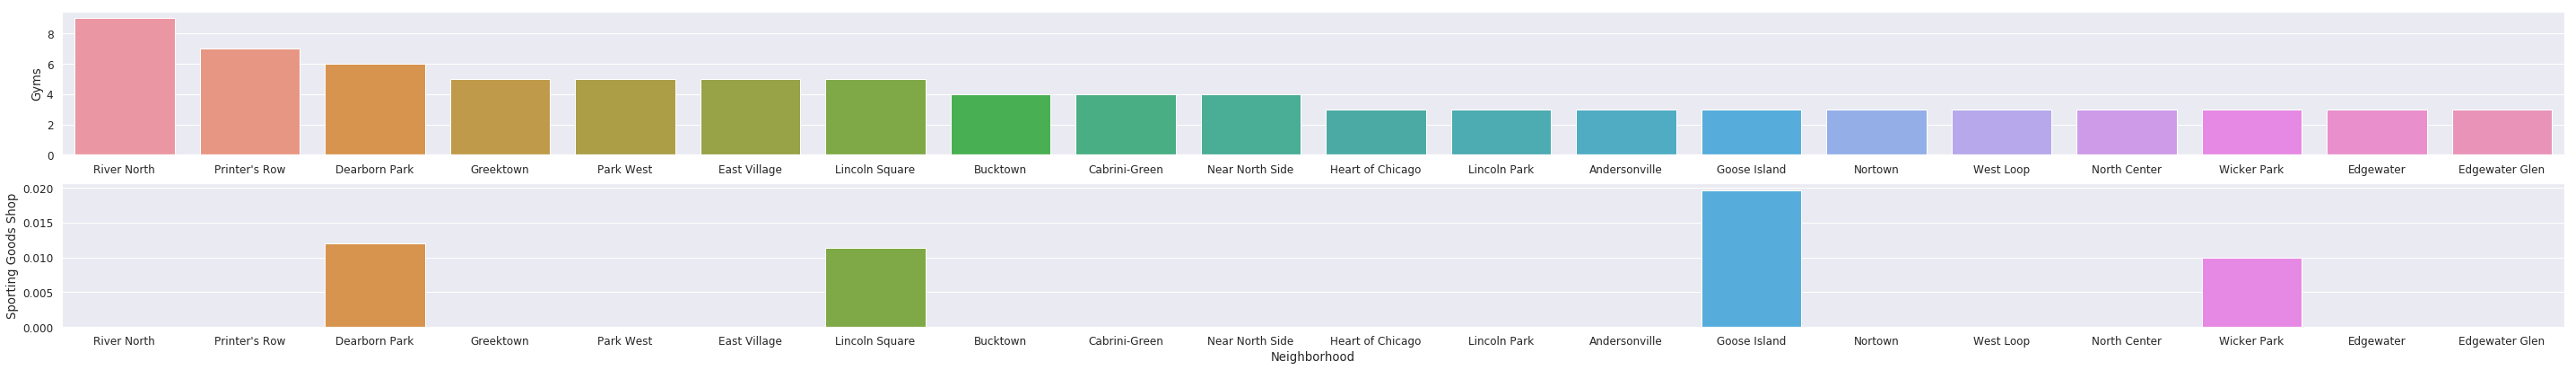

In [42]:
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,10))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.barplot(x="Neighborhood", y="Gyms", data=top_nb_by_num);
plt.xlabel("")

plt.subplot(3,1,2)
sns.barplot(x="Neighborhood", y="Sporting Goods Shop", data=top_nb_by_num);

#ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
#plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

And the result of top 20 neighborhoods by popularity.

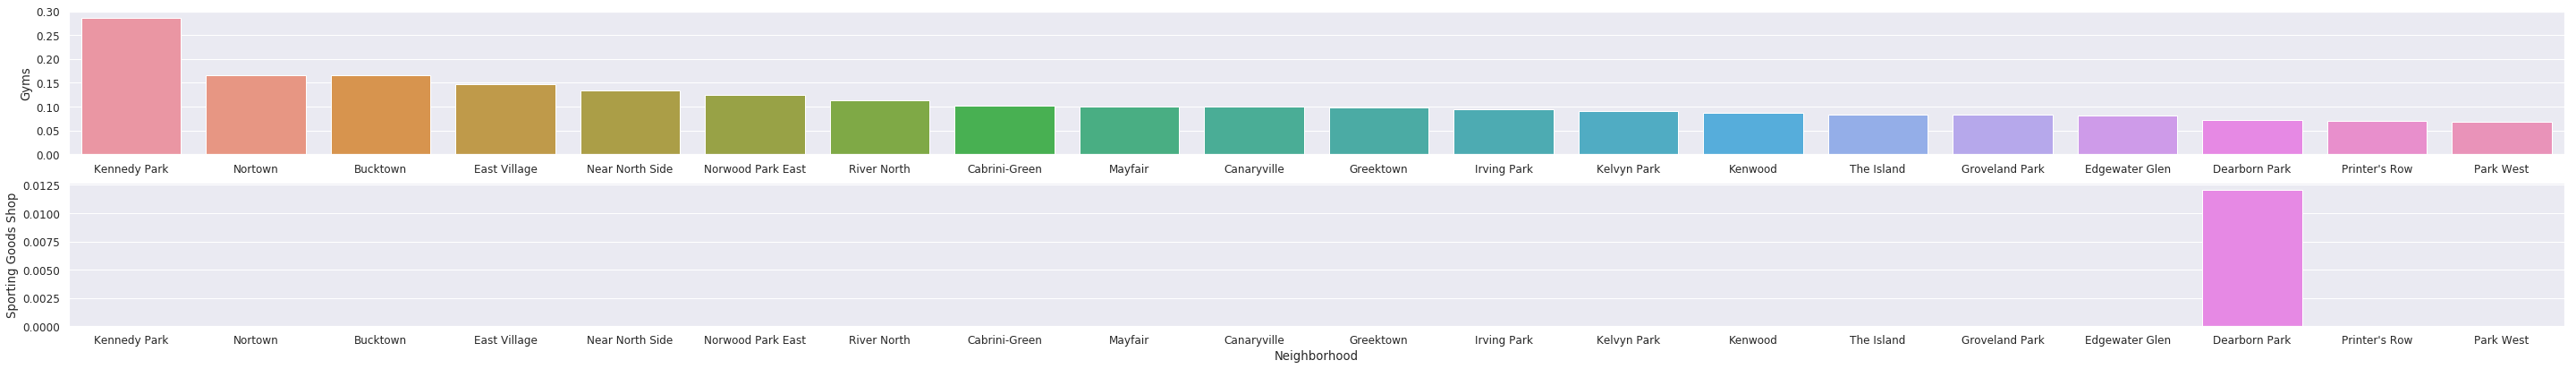

In [43]:
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,10))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.barplot(x="Neighborhood", y="Gyms", data=top_nb_by_pop);
plt.xlabel("")

plt.subplot(3,1,2)
sns.barplot(x="Neighborhood", y="Sporting Goods Shop", data=top_nb_by_pop);

#ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
#plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

Finally to answer the business question we need to compare both of dataframes to find neighborhoods, where we have a large amount of gyms, and where are they popular.

In [44]:
top_nb_combo = pd.merge(top_nb_by_num,top_nb_by_pop, on='Neighborhood', how='inner')
top_nb_combo

,Neighborhood,Gyms_x,Longitude_x,Latitude_x,Community area_x,Sporting Goods Shop_x,Gyms_y,Longitude_y,Latitude_y,Community area_y,Sporting Goods Shop_y
0,River North,9,-87.635719,41.896471,Near North Side,0.000000,0.113924,-87.635719,41.896471,Near North Side,0.000000
1,Printer's Row,7,-87.628900,41.873787,The Loop,0.000000,0.070000,-87.628900,41.873787,The Loop,0.000000
2,Dearborn Park,6,-87.628954,41.866553,Near South Side,0.012048,0.072289,-87.628954,41.866553,Near South Side,0.012048
3,Greektown,5,-87.646932,41.878445,Near West Side,0.000000,0.098039,-87.646932,41.878445,Near West Side,0.000000
4,Park West,5,-87.645661,41.920892,Lincoln Park,0.000000,0.067568,-87.645661,41.920892,Lincoln Park,0.000000
5,East Village,5,-87.655358,41.896198,West Town,0.000000,0.147059,-87.655358,41.896198,West Town,0.000000
6,Bucktown,4,-87.670123,41.916211,Logan Square,0.000000,0.166667,-87.670123,41.916211,Logan Square,0.000000
7,Cabrini-Green,4,-87.640937,41.898805,Near North Side,0.000000,0.102564,-87.640937,41.898805,Near North Side,0.000000
8,Near North Side,4,-87.634497,41.900033,Near North Side,0.000000,0.133333,-87.634497,41.900033,Near North Side,0.000000
9,Nortown,3,-87.660611,41.910530,West Ridge,0.000000,0.166667,-87.660611,41.910530,West Ridge,0.000000


As far as for the first case we count gyms in numbers, and for the second case in relationship, an idea is to nolmalize theese columns avalue and deriver the combined column.

In [45]:
from sklearn import preprocessing

column_names_to_normalize = ['Gyms_x','Gyms_y']
x = top_nb_combo[column_names_to_normalize].values
x_scaled = preprocessing.MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = top_nb_combo.index)
top_nb_combo[column_names_to_normalize] = df_temp
s = top_nb_combo['Gyms_x'] + top_nb_combo['Gyms_y']
top_nb_combo['Gyms'] = s
top_nb_combo = top_nb_combo.sort_values(by=['Gyms'], ascending=False)
top_nb_combo

,Neighborhood,Gyms_x,Longitude_x,Latitude_x,Community area_x,Sporting Goods Shop_x,Gyms_y,Longitude_y,Latitude_y,Community area_y,Sporting Goods Shop_y,Gyms
0,River North,1.000000,-87.635719,41.896471,Near North Side,0.000000,0.467779,-87.635719,41.896471,Near North Side,0.000000,1.467779
6,Bucktown,0.166667,-87.670123,41.916211,Logan Square,0.000000,1.000000,-87.670123,41.916211,Logan Square,0.000000,1.166667
5,East Village,0.333333,-87.655358,41.896198,West Town,0.000000,0.802139,-87.655358,41.896198,West Town,0.000000,1.135472
9,Nortown,0.000000,-87.660611,41.910530,West Ridge,0.000000,1.000000,-87.660611,41.910530,West Ridge,0.000000,1.000000
8,Near North Side,0.166667,-87.634497,41.900033,Near North Side,0.000000,0.663636,-87.634497,41.900033,Near North Side,0.000000,0.830303
1,Printer's Row,0.666667,-87.628900,41.873787,The Loop,0.000000,0.024545,-87.628900,41.873787,The Loop,0.000000,0.691212
3,Greektown,0.333333,-87.646932,41.878445,Near West Side,0.000000,0.307487,-87.646932,41.878445,Near West Side,0.000000,0.640820
2,Dearborn Park,0.500000,-87.628954,41.866553,Near South Side,0.012048,0.047645,-87.628954,41.866553,Near South Side,0.012048,0.547645
7,Cabrini-Green,0.166667,-87.640937,41.898805,Near North Side,0.000000,0.353147,-87.640937,41.898805,Near North Side,0.000000,0.519814
4,Park West,0.333333,-87.645661,41.920892,Lincoln Park,0.000000,0.000000,-87.645661,41.920892,Lincoln Park,0.000000,0.333333


Let's plot neighorhoods in terms of nubmer, popularity and combo on a single barplot.

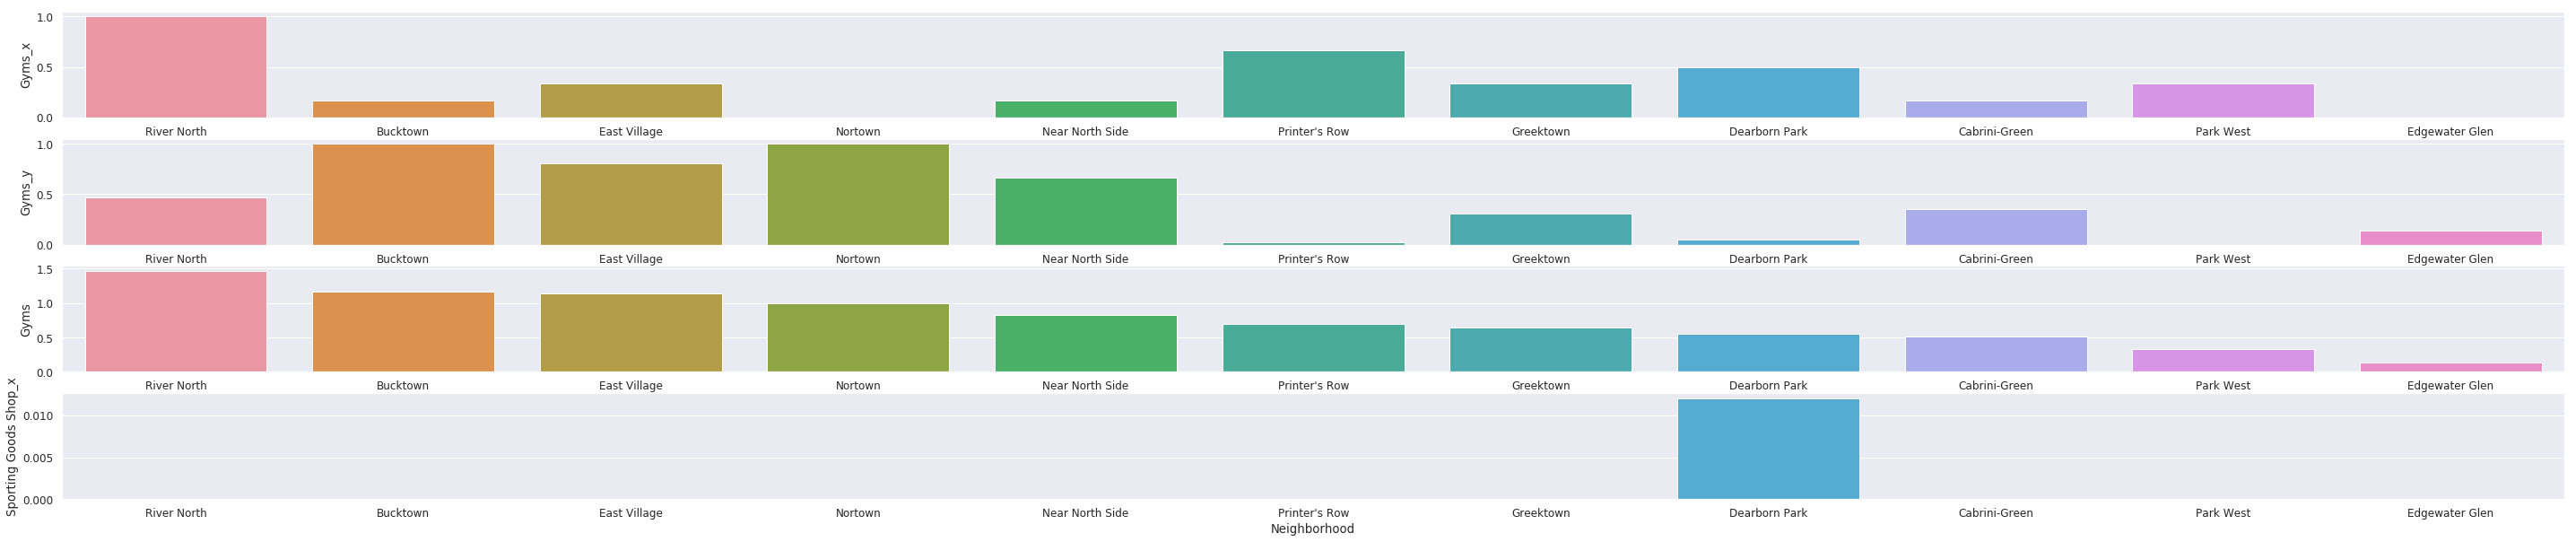

In [46]:
# Explore a plot of this data (a violin plot is used which is a density estimation of the underlying distribution).
# The top 3 venue types as specified by the client for each neighborhood are used for the plotting.

import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50,10))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.barplot(x="Neighborhood", y="Gyms_x", data=top_nb_combo);

plt.subplot(4,1,2)
sns.barplot(x="Neighborhood", y="Gyms_y", data=top_nb_combo);

plt.subplot(4,1,3)
sns.barplot(x="Neighborhood", y="Gyms", data=top_nb_combo);

plt.subplot(4,1,4)
sns.barplot(x="Neighborhood", y="Sporting Goods Shop_x", data=top_nb_combo);

#ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
#plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

And the last step is to make final datasets and plot them to a single map. 

In [47]:
top_5_num = top_nb_by_num['Neighborhood'].head(5)
top_5_pop = top_nb_by_pop['Neighborhood'].head(5)
top_3_combo = top_nb_combo['Neighborhood'].head(3)
top_5_num

0      River North
1    Printer's Row
2    Dearborn Park
3        Greektown
4        Park West
Name: Neighborhood, dtype: object

In [48]:
sel_num = nb[nb['Neighborhood'].isin(top_5_num)]
sel_pop = nb[nb['Neighborhood'].isin(top_5_pop)]
sel_combo = nb[nb['Neighborhood'].isin(top_3_combo)]
sel_pop

,Longitude,Latitude,Neighborhood,Community area
67,-87.683482,41.687226,Kennedy Park,Morgan Park
78,-87.670123,41.916211,Bucktown,Logan Square
91,-87.660611,41.910530,Nortown,West Ridge
101,-87.655358,41.896198,East Village,West Town
120,-87.634497,41.900033,Near North Side,Near North Side


In [49]:
sel_chicago = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(sel_num['Latitude'], sel_num['Longitude'], sel_num['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.3,
        parse_html=False).add_to(sel_chicago)
for lat, lng, label in zip(sel_pop['Latitude'], sel_pop['Longitude'], sel_pop['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.3,
        parse_html=False).add_to(sel_chicago)

for lat, lng, label in zip(sel_combo['Latitude'], sel_combo['Longitude'], sel_combo['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.3,
        parse_html=False).add_to(sel_chicago)
    
sel_chicago

## Results and discussion

Three metrics were used in this work. The first of them was based on the number of gyms (red circles), and the other on their popularity (blue circles). The third one is a combination of first two (yellow circles). It was found out that both of initial metrics shows that desired neighborhoods are located near the center of the city. The most desirebale neighborhoods are:

1. River North
2. Bucktown
3. East Village

Bar plots in addition show, that there are not many sporting goods shops in neighborhoods selected by popularity metrics and combined one. Our company strategy relies on the combined metrics, so its results show the low level of the competition.

## Conclusions

In conclusion, we can say that different methodologies, data sources and metrics can be used to resolve that question. This work highly relies on Foursquare API. The industry is changing and the location of gyms and sporting goods shops changes. The way i've choosen starts with finding a large amount of locations, and then, step by step, narrowing the number of them. The answer to the initial question is data-driven and rather easy for stackholders to understand. Moreover it is reusable and may help in further investigations.

It could be very timeconsuming to find a location for the store without used methods. This work shows the easy way to make data-driven recomendations.